### COVID 19 data clean up and plotting

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# import Dependencies
import mpl_toolkits.axisartist as AA
from pylab import figure, show, legend, ylabel
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Get datafile
allState_path = "us-states.csv"
usCovid_path = "national-history.csv"
conSent_path = "UMICH-SOC38.csv"
# Read the data and assign variable
allState_covid = pd.read_csv(allState_path)
usCovid_covid = pd.read_csv(usCovid_path)
consumer_sentiment = pd.read_csv(conSent_path)

In [3]:
# Display to Analyze and clean up dataframe for the US
usCovid_covid

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-12-11,287058.0,2749,33237.0,21010.0,5444,108108.0,608998.0,168637806,1449905,3424.0,7489.0,15592946,232105,6135314.0,56,215110717,2094901
1,2020-12-10,284309.0,3115,32919.0,21023.0,4335,107276.0,603554.0,167187901,1339749,3394.0,7442.0,15360841,215669,5985047.0,56,213015816,1954686
2,2020-12-09,281194.0,3170,32720.0,20906.0,5424,106705.0,599219.0,165848152,1276606,3376.0,7624.0,15145172,211020,5891885.0,56,211061130,1822067
3,2020-12-08,278024.0,2697,32406.0,20483.0,4309,104623.0,593795.0,164571546,1192820,3359.0,7245.0,14934152,215335,5788509.0,56,209239063,1628432
4,2020-12-07,275327.0,1297,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14718817,180219,5714557.0,56,207610631,1772911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
321,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
322,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
323,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [4]:
# Make new data frame containing only two columns
usCovid_df = usCovid_covid.loc[:,['date', 'positiveIncrease']]
usCovid_df

,date,positiveIncrease
0,2020-12-11,232105
1,2020-12-10,215669
2,2020-12-09,211020
3,2020-12-08,215335
4,2020-12-07,180219
...,...,...
320,2020-01-26,0
321,2020-01-25,0
322,2020-01-24,0
323,2020-01-23,0


In [5]:
#Sort data frame by date so that numbers of positive cases will be smaller on top
cov = usCovid_df.sort_values(by=['date'])
cov.head(40)


,date,positiveIncrease
324,2020-01-22,0
323,2020-01-23,0
322,2020-01-24,0
321,2020-01-25,0
320,2020-01-26,0
319,2020-01-27,0
318,2020-01-28,0
317,2020-01-29,0
316,2020-01-30,0
315,2020-01-31,0


## Plot bar chart for daily count of new Covid cases

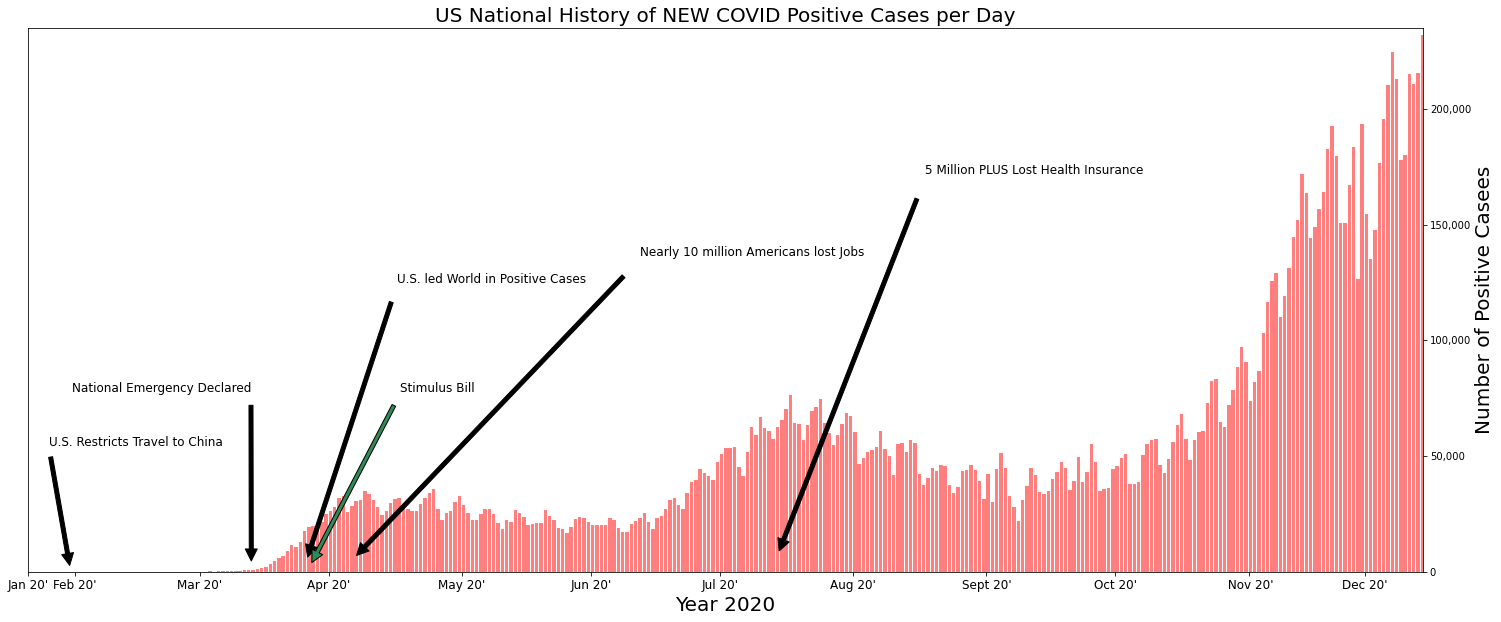

In [26]:
# Set x axis 
x_axis = np.arange(len(usCovid_df))
# Create a list indicating where to write x labels and set figure size to adjust for space
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)
# Combine line plot and bar plot to one plot
#plt.plot(x_axis, cov['positiveIncrease'])
plt.bar(x_axis, cov['positiveIncrease'], color = 'r', alpha = 0.50,align = 'edge')
# y-axis on the right side
ax.yaxis.tick_right()
#plt.xticks(tick_locations)
ax.set_xticks([0,11,40,70,101,131,161,192,223,253,284,311])
ax.set_xticklabels(["Jan 20'","Feb 20'", "Mar 20'", "Apr 20'", "May 20'", "Jun 20'",
                   "Jul 20'", "Aug 20'", "Sept 20'","Oct 20'", " Nov 20'", "Dec 20'"],fontsize = 12)
plt.xlim(0,324.5)
plt.ylim(-1,235000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("US National History of NEW COVID Positive Cases per Day",fontsize = 20)
plt.xlabel('Year 2020',fontsize = 20)
#plt.ylabel("Number of Postive Cases")
ax.yaxis.set_label_position('right')

#Historical Markers
ax.set_ylabel('Number of Positive Casees', fontsize = 20)
#ax.annotate('07/13 More than 5 Million Americans Lose Health Insurance', xy=(173, 300), xytext=(50, 100),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('03/13 National Emergency Declared', xy=(52, 100000), xytext=(.2, 1.),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('03/27 Stimulus Bill Signed', xy=(65, 130), xytext=(80, .35),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('03/26 U.S. led World in Positive Cases', xy=(64, 120), xytext=(.2, .35),
            #arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('01/31 Trump Restricts Travel from China', xy=(10, 60), xytext=(.08, .20),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('National Emergency Declared', xy=(52, 900),  xycoords='data',
            xytext=(.16, .350), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)        
ax.annotate('5 Million PLUS Lost Health Insurance', xy=(173, 500),  xycoords='data',
            xytext=(.8, .75), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('Nearly 10 million Americans lost Jobs', xy=(73, 300),  xycoords='data',
            xytext=(.6, .60), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('U.S. led World in Positive Cases', xy=(64, 200),  xycoords='data',
            xytext=(.4, .55), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('Stimulus Bill', xy=(65, 170),  xycoords='data',
            xytext=(.32, .35), textcoords='axes fraction',
            arrowprops=dict(facecolor='seagreen', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('U.S. Restricts Travel to China', xy=(10, 100),  xycoords='data',
            xytext=(.14, .25), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
# Save image in directory COVID_data
plt.savefig('covid_us_barplot.png')
plt.show()

# # plot line chart for US Covid

In [ ]:
# Create a list indicating where to write x labels and set figure size to adjust for space
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

plt.plot(x_axis, cov['positiveIncrease'])
#plt.xticks(tick_locations)
ax.set_xticks([0,11,40,70,101,131,161,192,223,253,284,311])
ax.set_xticklabels(["Jan 20'"," Feb 20'", "Mar 20'", "Apr 20'", "May 20'", "Jun 20'",
                   "Jul 20'", "Aug 20'", "Sept 20'","Oct 20'", " Nov 20'", "Dec 20'"],fontsize = 12)
# y-axis on the right side
ax.yaxis.tick_right()
plt.xlim(0,324.5)
plt.ylim(-1,235000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("US National History of NEW COVID Positive Cases per Day",fontsize = 20)
plt.xlabel('Year 2020',fontsize = 20)
#plt.ylabel("Number of Postive Cases")
ax.yaxis.set_label_position('right')
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

#Historical Markers
ax.set_ylabel('Number of Positive Casees', fontsize = 20)
#ax.annotate('07/13 More than 5 Million Americans Lose Health Insurance', xy=(173, 3000000), xytext=(130, 7000000),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('03/13 National Emergency Declared', xy=(52, 100000), xytext=(7, 4000000),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('03/27 Stimulus Bill Signed', xy=(64, 10000), xytext=(80, 4500000),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('03/26 U.S. led World in Positive Cases', xy=(63, 10000), xytext=(80, 8000000),
            #fontsize = 15, arrowprops=dict(facecolor='black', shrink=0.05))

# Save image in directory COVID_data
plt.savefig('covid_us_lineplot.png')
plt.show()

In [ ]:
# Display to Analyze and clean up dataframe for all states
allState_covid

In [ ]:
# Clean dataframe and drop rows with Nan
allState_covid_df = allState_covid.loc[:,['state','cases']]
allState_covid_df

In [ ]:
# make dataframe out of grouped state and column death

state_df = allState_covid_df.groupby('state')

sum_state = state_df['cases'].mean()
state_drop = sum_state.drop(['Guam','Puerto Rico','Virgin Islands','Northern Mariana Islands','District of Columbia'])

sumCases_perState = state_drop.reset_index()
sumCases_perState

In [ ]:
sumCases_perState.describe()

In [ ]:
# Create a bar plot that shows covid cases per state
# fig size
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)
# make a list for state and cases
x_axis = sumCases_perState['state'].tolist()
y_axis = sumCases_perState['cases'].tolist()

# format numbers to avoid scientific notation
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# rotate text vertically
plt.xticks(rotation = 'vertical')
# plot bar graph
plt.bar(x_axis,y_axis, align = 'center', width = .75, color = "red", alpha = 0.75)
# Labels
plt.xlim(-0.5,len(x_axis)-.5)
plt.ylim(0, 450000)
plt.ylabel('Number of Positive Cases',fontsize = 20)
plt.title("2020 Total Number of Positive Cases Per State" ,fontsize = 20)
plt.xlabel('U.S. States',fontsize = 20)
# save to file
plt.savefig('covid_st_barplot.png')

plt.show()



In [ ]:
# Covid line plot cases per state 
#define x and y axis
x_axis = sumCases_perState['state'].tolist()
y_axis = sumCases_perState['cases'].tolist()
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation = 'vertical')

plt.plot(x_axis,y_axis,c='red',alpha = 0.75)

plt.xlim(0,len(x_axis)-0.8)
plt.ylim(0, 450000)
plt.ylabel('Number of Positive Cases',fontsize = 20)
plt.title("2020 Number of Positive Cases Per State" ,fontsize = 20)
plt.xlabel('U.S. States',fontsize = 20)

#plt.savefig('covid_st_plot.png')

plt.show()

In [ ]:
# Display consumer_sentiment dataframe
consumer_sentiment

In [ ]:
# Creating a dataframe for consumer sentiment with renaming columns
consumer_sentiment_df = consumer_sentiment.loc[:,['Date', "Good Time<br>Times good","Good Time<br>Interest rates low"]]
consumer_sentiment_df.rename(columns = {"Good Time<br>Times good":"Good Times","Good Time<br>Interest rates low":
                                       "Good Time-Interest rates low"}, inplace = True) 
consumer_sentiment_df

In [ ]:
consumer_sentiment_df['Date'] = pd.to_datetime(consumer_sentiment_df['Date'])
consumer_sentiment_df

In [ ]:
consumer_sentiment_df.dtypes

In [ ]:
start_date = '2019-12-31'
end_date = '2020-10-31'
mask = (consumer_sentiment_df['Date'] > start_date) & (consumer_sentiment_df['Date'] <= end_date)


In [ ]:
# Creating a dataframe for just the available data for the start date to end dates of 2020
Con_Sum_df = consumer_sentiment_df.loc[mask]
#Con_Sum_df

In [ ]:

Con_Sum_df = pd.DataFrame([["2020-01-01", 18.0,18.0], ["2020-02-01", 18,19], ["2020-03-01", 14.0,22.0], ["2020-04-01",5.0,19.0],
                      ["2020-05-01", 3.0,25.0], ["2020-06-01", 4.0,28.0], ["2020-07-01", 4.0,22.0], ["2020-08-01",5.0,25.0],
                      ['2020-09-01',7.0,25.0], ['2020-10-01',7.0,24.0]], 
                   columns=["Date", "Good Times", "Good Times-Interest rates low"])

#Con_Sum_df['Date'] = pd.to_datetime(Con_Sum_df['Date'])
Con_Sum_df

In [ ]:
Con_Sum_df.dtypes


In [ ]:
# Using cov dataframe select start and end dates to view in plot
#start_date = '2019-12-31'
#end_date = '2020-10-31'
#mask2 = (cov['date'] > start_date) & (cov['date'] <= end_date)
# Creating a dataframe for just the available data for the start date to end dates of 2020
#Cov_df = cov.loc[mask2]
#Cov_df

In [ ]:
# Group by month positive cases per day
cov['date'] = pd.to_datetime(cov['date'])
cov_month = cov.groupby(cov['date'].dt.strftime('%B'))['positiveIncrease'].sum().sort_values()
cov_month_df= cov_month.reset_index()
cov_month_df

In [ ]:
cov_month_df = pd.DataFrame([["2020-01-01", 0], ["2020-02-01", 18], ["2020-03-01", 197906], ["2020-04-01", 875821],
                      ["2020-05-01", 717464], ["2020-06-01", 832778], ["2020-07-01", 1898074], ["2020-08-01",1452932],
                      ['2020-09-01',1190447], ['2020-10-01',1883549], ['2020-11-01',4291045],
                      ["2020-12-01",2252912]], 
                   columns=["date", "positiveIncrease"])
cov_month_df = cov_month_df.rename(columns={"date":"Date","positiveIncrease":"Positive Per Month"})

#cov_month_df['Date'] = pd.to_datetime(cov_month_df['Date'])
cov_month_df

In [ ]:
cov_month_df.dtypes

In [ ]:
# Created merged dataframe
casesVsentiment = pd.merge(Con_Sum_df,cov_month_df)
casesVsentiment

In [ ]:
casesVsentiment.dtypes

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

x_axis = casesVsentiment['Date']
x_axis1 = casesVsentiment['Date']
x_axis2 = casesVsentiment['Date']
y_axis = casesVsentiment["Good Times"]

y_axis1 = casesVsentiment["Good Times-Interest rates low"]

y_axis2 = casesVsentiment["Positive Per Month"]
#ax = f.add_subplot(111)
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.xticks(rotation = 'vertical')
# fig size
f=plt.figure(figsize=(25,10))
ax = f.add_subplot(111)
line1, = ax.plot(x_axis,y_axis,c='blue',alpha = 0.75, label = "Good Time Sentiment")

line2, = plt.plot(x_axis1,y_axis1,c='green',alpha = 0.75, label = "Good Times-Interest rates low")

plt.ylabel('Consumer Senitiment',fontsize = 20)
ax2 = ax.twinx()
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

line3, = ax2.plot(x_axis2,y_axis2,c='red',lw=3, label = "Positive Covid Cases")
ax2.set_ylabel('COVID Positive Numbers Per Month', fontsize = 20)
first_legend = plt.legend(handles=[line1,line2,line3], loc='lower right')
plt.xlim(-.02,len(x_axis)-1)
plt.ylim(0, 2000000)

plt.title("Buying Conditions for Vehicles vs. Covid Positive Cases Monthly" ,fontsize = 20)


# x coordinates for the lines
xcoords = [.9838,2.4193, 2.9,3.066,6.4193,5.66]
# colors for the lines
colors = ['r','r','g','r','r','r']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, lw=2, ls='dotted')
plt.savefig('buying_conditions_cars.png')
plt.show()

### The Covid dataset were for the per month total to match the per month data from Consumer Sentiments report by UMICH